# Assignment Sheet 3

# Assignment 3.1

In this task we generate two dimensional data with two classes (meaning that there are a total of three columns in your data set, features x1, x2 and label) synthetically. Use a tool-kit of your choice.


a) Select 100 samples (per class) from a normal distribution. For the first class, consider the mean as (0,0) and covariance matrix as [(1,0),(0,1)]. For the second class, consider the mean as (5,0) and same covariance matrix. Visualise all 200 instances in a single plot with different colors for each class.

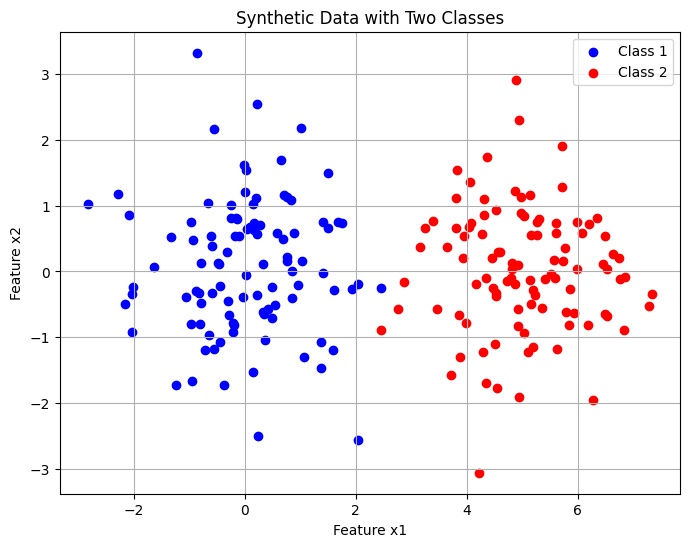

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.inspection import DecisionBoundaryDisplay

# a)
rng = np.random.default_rng(seed=3)
class1_data = rng.multivariate_normal(mean=(0, 0), cov=[[1, 0], [0, 1]], size=100)
class2_data = rng.multivariate_normal(mean=(5, 0), cov=[[1, 0], [0, 1]], size=100)

plt.figure(figsize=(8, 6))
plt.scatter(class1_data[:, 0], class1_data[:, 1], color='blue', label='Class 1')
plt.scatter(class2_data[:, 0], class2_data[:, 1], color='red', label='Class 2')
plt.title('Synthetic Data with Two Classes')
plt.xlabel('Feature x1')
plt.ylabel('Feature x2')
plt.legend()
plt.grid(True)
plt.show()

b) Play with the data by trying out different mean values which are close between the classes. Create data set two by keeping all parameters same as above, just change the second mean to (2.25,0). Visualize it!

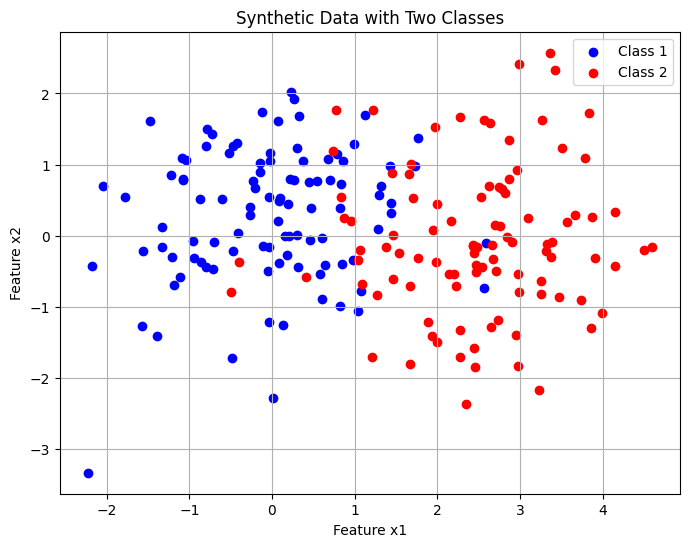

In [3]:
# b)
class1_data2 = rng.multivariate_normal(mean=(0, 0), cov=[[1, 0], [0, 1]], size=100)
class2_data2 = rng.multivariate_normal(mean=(2.5, 0), cov=[[1, 0], [0, 1]], size=100)

plt.figure(figsize=(8, 6))
plt.scatter(class1_data2[:, 0], class1_data2[:, 1], color='blue', label='Class 1')
plt.scatter(class2_data2[:, 0], class2_data2[:, 1], color='red', label='Class 2')
plt.title('Synthetic Data with Two Classes')
plt.xlabel('Feature x1')
plt.ylabel('Feature x2')
plt.legend()
plt.grid(True)
plt.show()

c) Combine the data sampled in the first step (both of the classes) and cre- ate a single data set of 200 instances. Randomize the data. Fit a logistic regression model on two thirds of data (randomly sampled). Report the model performance on the remaining one-third (test set). Now perform the same task but with strat- ified sampling, plot the data with the decision boundary.

Fitting logistic regression on 2/3 of the data with random sampling results in test accuracy of 98.4 %. If we use stratified sampling, I obtain an accuracy of 1. If we sample randomly, there is no guarantee that we get the same number of samples from class 1 and class 2, but it is guaranteed if we use stratified sampling, which can consequently increase our classification accuracy.

0.9848484848484849
1.0


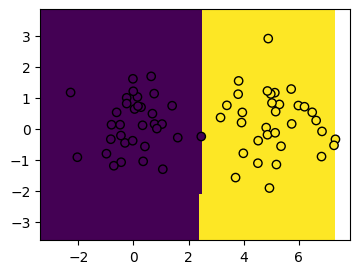

In [5]:
# c)
class_label1 = np.array([1]*100)
class_label2 = np.array([2]*100)
arr1 = np.array(class1_data)
arr2 = np.array(class2_data)

# Add class labels

# Combin the data
arr3 = np.vstack((arr1, arr2))
# class_labels = np.c_[class_label1, class_label2]
class_labels = np.hstack((class_label1, class_label2))

# Draw samples randomly and fit a logistic regression
X_train, X_test, y_train, y_test = train_test_split(arr3, class_labels, test_size=0.33, random_state=42)

clf = LogisticRegression(random_state=0).fit(X_train, y_train)
print(clf.score(X_test, y_test))

# Stratified sampling
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.33, random_state=42)
for train_index, test_index in sss.split(arr3, class_labels):
    X_train, X_test = arr3[train_index], arr3[test_index]
    y_train, y_test = class_labels[train_index], class_labels[test_index]

clf = LogisticRegression(random_state=0).fit(X_train, y_train)
print(clf.score(X_test, y_test))

clf.fit(X_train, y_train)

_, ax = plt.subplots(figsize=(4, 3))
DecisionBoundaryDisplay.from_estimator(
    clf,
    X_train,
    ax=ax,
    response_method="predict",
    plot_method="pcolormesh",
    eps=0.5,
)

# Plot also the training points
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, edgecolors="k")
plt.show()